# **Heart Failure Prediction**

**About this dataset**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Sex - Gender of patient Male = 1, Female =0
Age - Age of patient
Diabetes - 0 = No, 1 = Yes
Anaemia - 0 = No, 1 = Yes
High_blood_pressure - 0 = No, 1 = Yes
Smoking - 0 = No, 1 = Yes
DEATH_EVENT - 0 = No, 1 = Yes

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/default.ASUS/OneDrive/Desktop/Courses/IBM Machine Learning/02 Supervised Machine Learning Regression/26 Final Project/Heart Failure Prediction/heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: title={'center': 'Death Event Count'}, xlabel='DEATH_EVENT'>

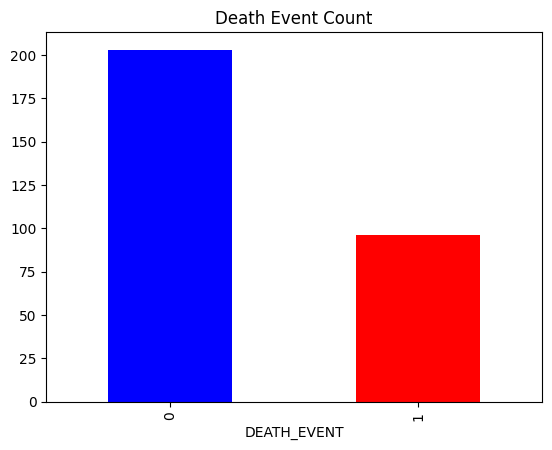

In [7]:
df.DEATH_EVENT.value_counts().plot(kind='bar', color=['blue', 'red'], title='Death Event Count')

In [8]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [9]:
# Categorical and Numerical Continious Features 
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('==============================')
print(f"Categorical Features : {categorical_val}")
print(f"Continous Features : {continous_val}")

age : [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anaemia : [0 1]
creatinine_phosphokinase : [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334

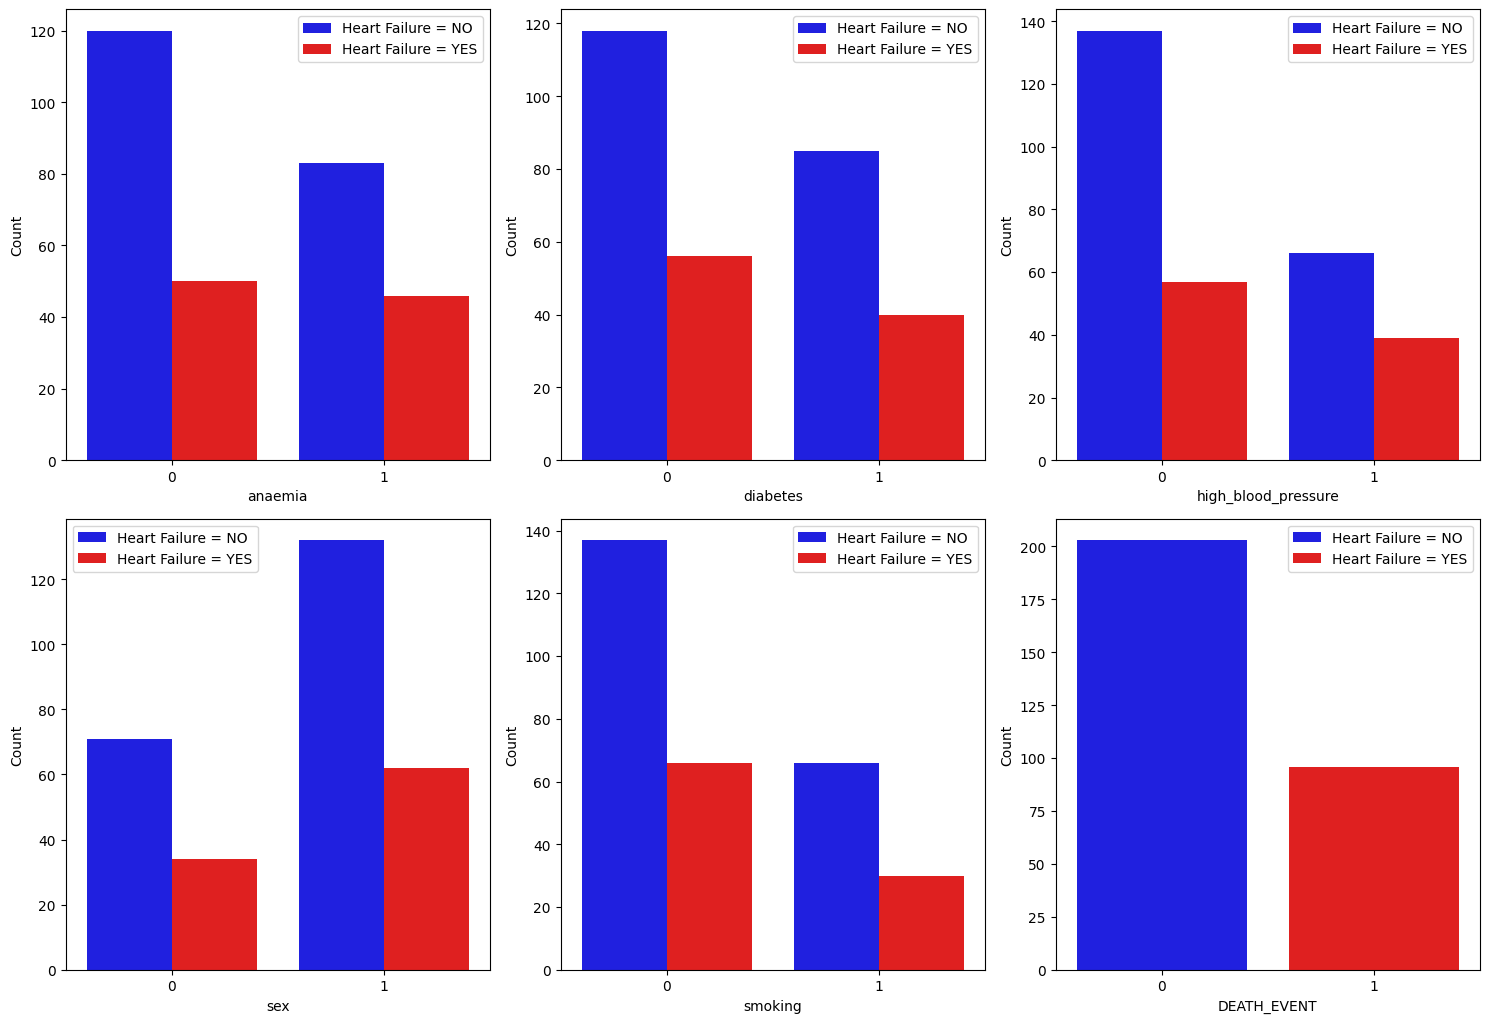

In [10]:
#Study of the relationship of categorical features and heart disease:

# Number of categorical features
num_features = len(categorical_val)
rows = (num_features // 3) + 1  # Adjust rows dynamically

plt.figure(figsize=(15, rows * 5))  # Adjust figure size based on the number of features

for i, column in enumerate(categorical_val, 1):
    plt.subplot(rows, 3, i)
    
    # Use Seaborn countplot for better categorical visualization
    sns.countplot(data=df, x=column, hue="DEATH_EVENT", palette={0: 'blue', 1: 'red'})
    
    plt.legend(["Heart Failure = NO", "Heart Failure = YES"])
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()  # Prevent overlapping
plt.show()

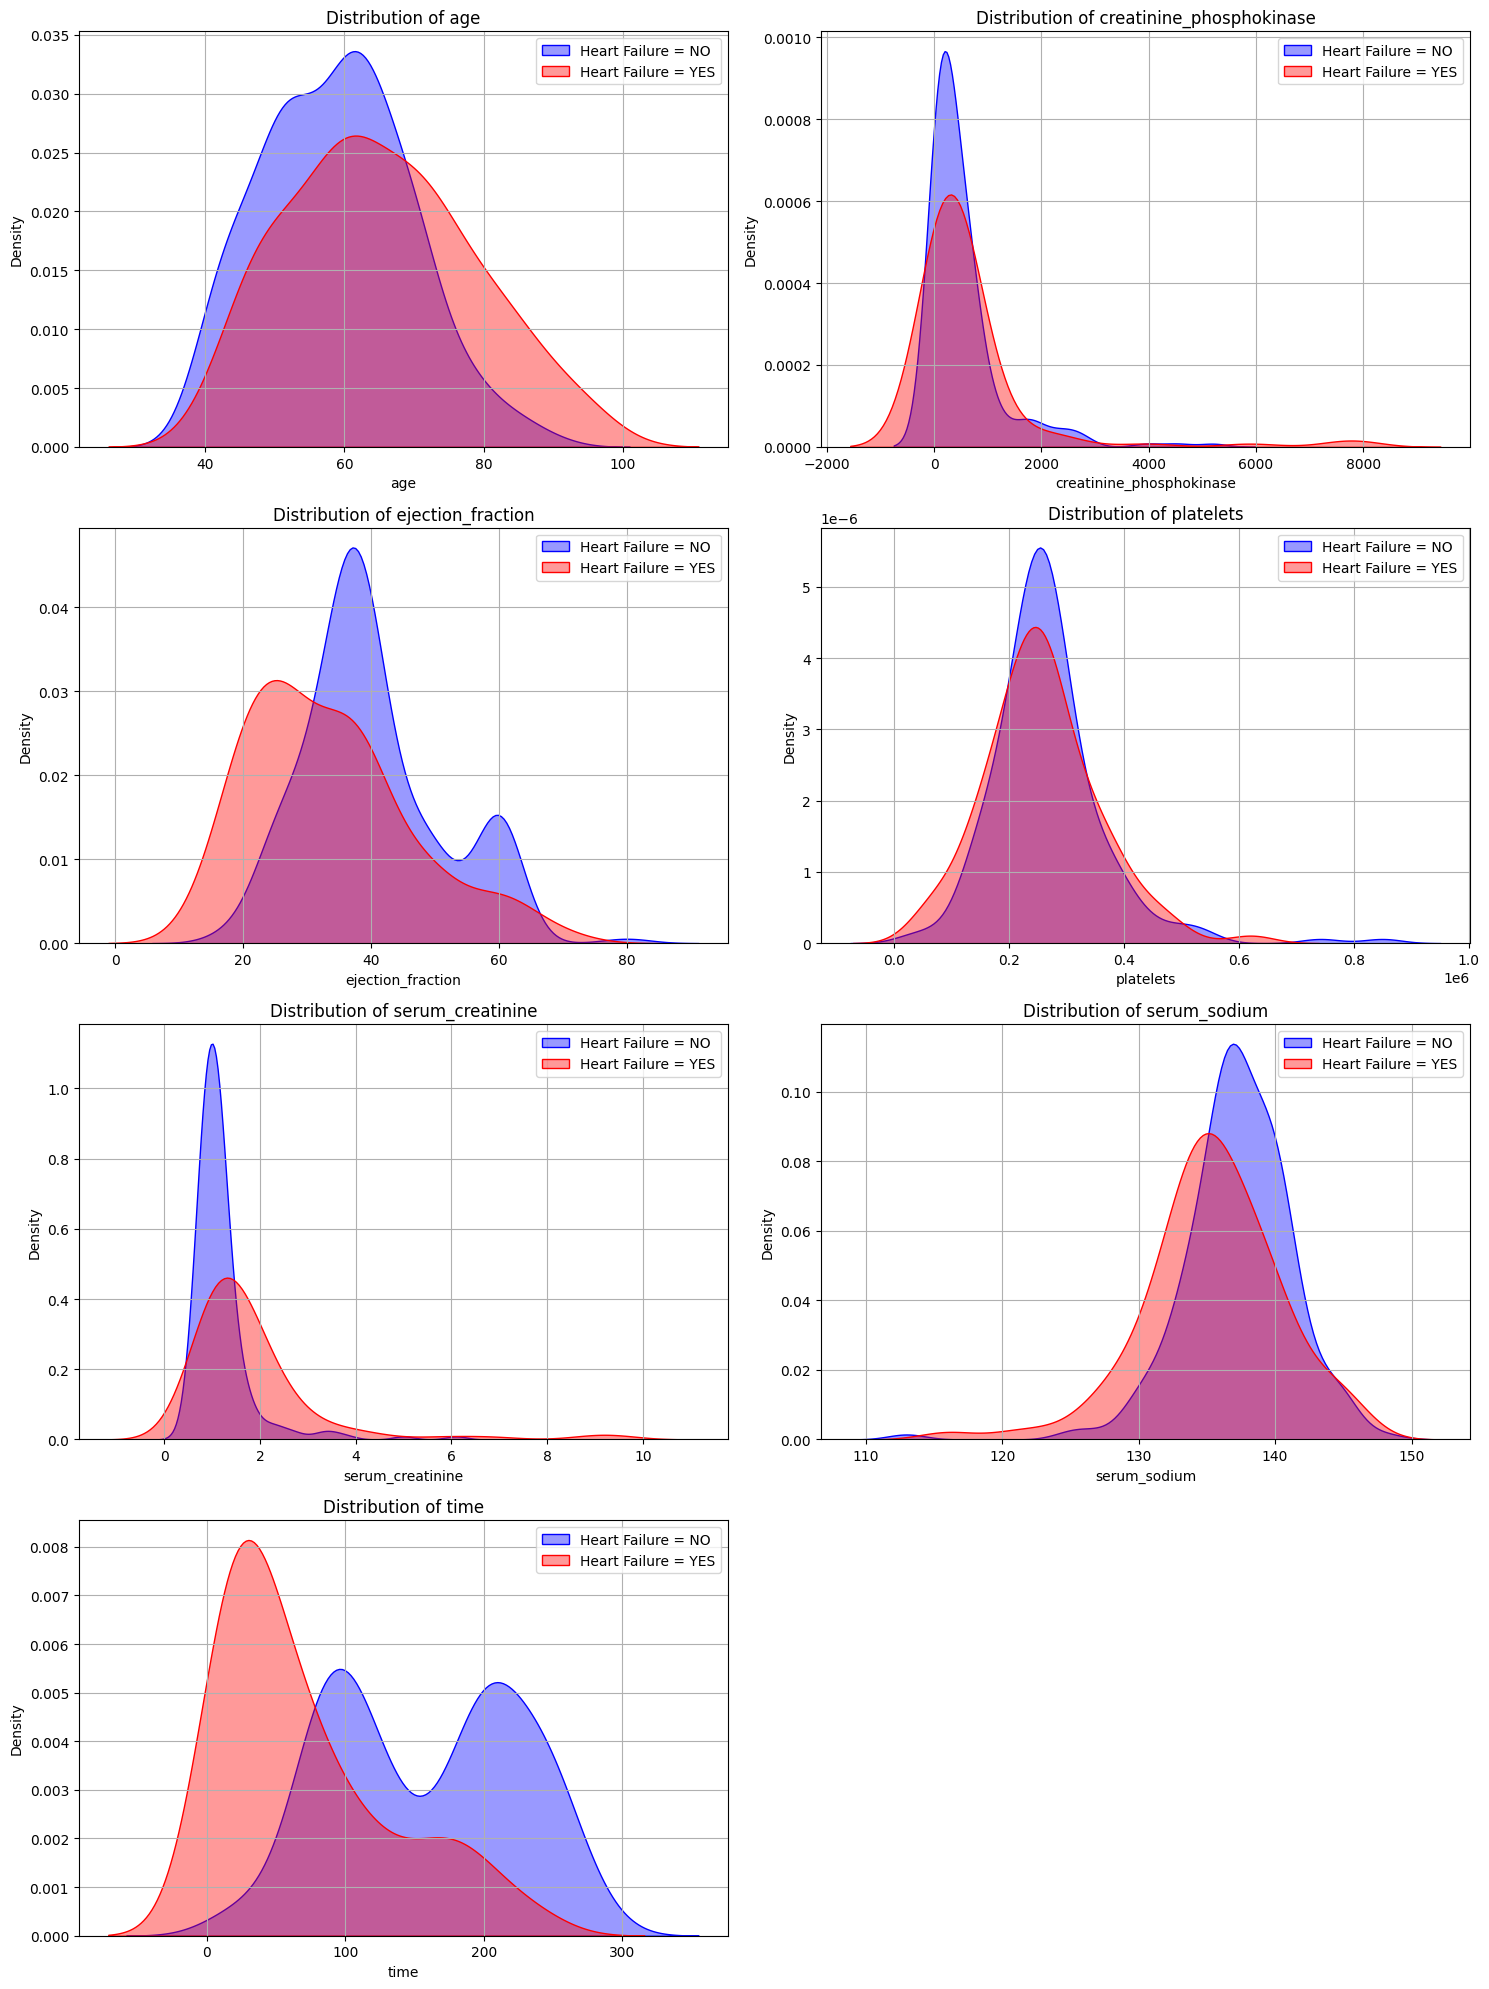

In [11]:
#Study of the relationship of continuous features and heart disease:

# Number of continuous features
num_features = len(continous_val)
rows = (num_features // 2) + (num_features % 2)  # Dynamically adjust rows

plt.figure(figsize=(15, rows * 5))  # Adjust figure size based on feature count

for i, column in enumerate(continous_val, 1):
    plt.subplot(rows, 2, i)
    
    # KDE plot for smooth distribution comparison
    sns.kdeplot(df[df["DEATH_EVENT"] == 0][column], color='blue', label='Heart Failure = NO', fill=True, alpha=0.4)
    sns.kdeplot(df[df["DEATH_EVENT"] == 1][column], color='red', label='Heart Failure = YES', fill=True, alpha=0.4)
    
    plt.legend()
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.grid(True)  # Improves readability

plt.tight_layout()  # Prevent overlapping
plt.show()


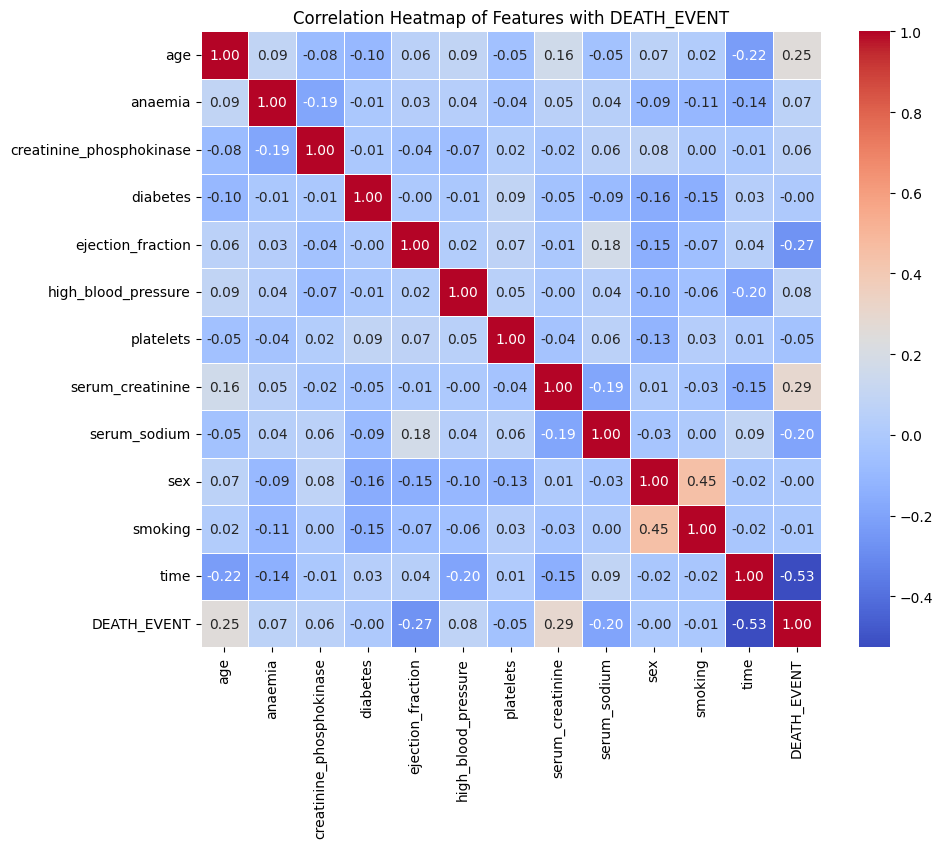

In [12]:
# Correlation Matrix

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Features with DEATH_EVENT")

# Show the plot
plt.show()


<Axes: title={'center': 'Correlation with target'}>

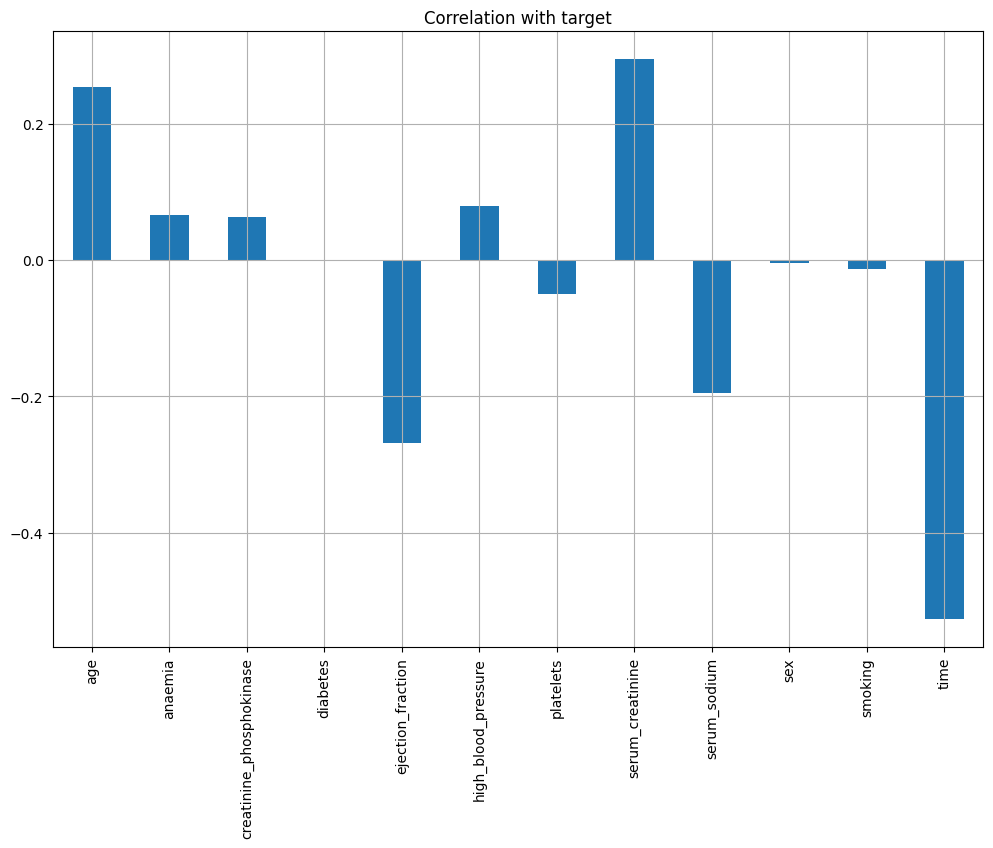

In [13]:
df.drop('DEATH_EVENT', axis=1).corrwith(df.DEATH_EVENT).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

## Data Modeling

1. Logistic Regression

In [14]:
categorical_val.remove('DEATH_EVENT')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
col_to_scale = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
dataset[col_to_scale] = sc.fit_transform(dataset[col_to_scale])

In [17]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
time,299.0,-1.901118e-16,1.001676,-1.629502,-0.739000,-0.196954,0.938759,1.997038
DEATH_EVENT,299.0,3.210702e-01,0.467670,0.000000,0.000000,0.000000,1.000000,1.000000


In [18]:
X = dataset.drop('DEATH_EVENT', axis=1)
y = dataset.DEATH_EVENT

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

                   0          1  accuracy  macro avg  weighted avg
precision   0.883333   0.766667  0.844444      0.825      0.844444
recall      0.883333   0.766667  0.844444      0.825      0.844444
f1-score    0.883333   0.766667  0.844444      0.825      0.844444
support    60.000000  30.000000  0.844444     90.000     90.000000


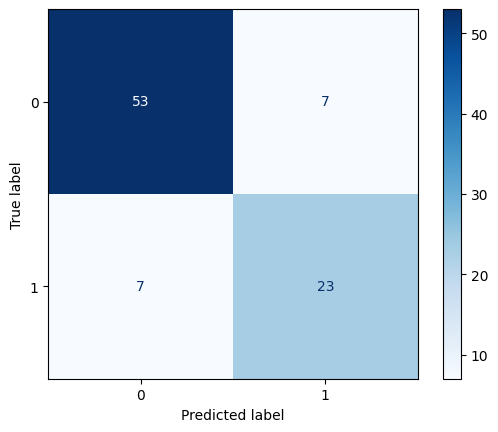

In [20]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred_0 = lr.predict(X_test)

# Generating the classification report as a DataFrame
clf_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))

# Display the classification report
print(clf_report)

# Confusion matrix for KNN predictions
cm = confusion_matrix(y_test, y_pred_0)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues')  # You can adjust the color map to your liking
plt.grid(False)  # Remove grid
plt.show()  # Display the plot

2. K Nearest Neighbors Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay

max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

# Get minimum error id 
min_error_id = error_results['Error Rate'].idxmin()

# Get Best K 
error_results.loc[min_error_id]

K             6.0000
Error Rate    0.2444
Name: 5, dtype: float64

Decision Tree Classifier Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.763889   0.722222  0.755556   0.743056      0.750000
recall      0.916667   0.433333  0.755556   0.675000      0.755556
f1-score    0.833333   0.541667  0.755556   0.687500      0.736111
support    60.000000  30.000000  0.755556  90.000000     90.000000


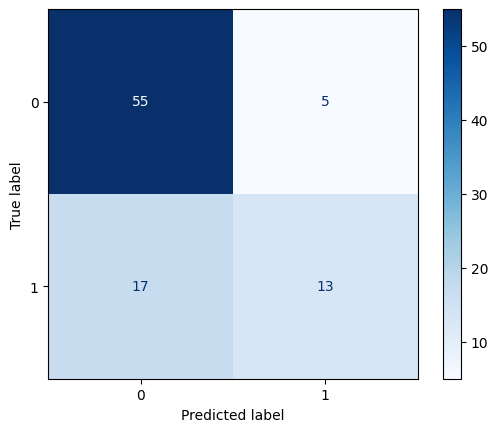

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the KNN classifier with n_neighbors=4 and 'distance' weights
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Generate the classification report as a DataFrame
KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

# Print classification report
print("Decision Tree Classifier Classification Report:")
print(KNN_report)

# Confusion matrix for KNN predictions
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues')  # You can adjust the color map to your liking
plt.grid(False)  # Remove grid
plt.show()  # Display the plot



3. Support Vector Machine

                   0          1  accuracy  macro avg  weighted avg
precision   0.879310   0.718750  0.822222   0.799030      0.825790
recall      0.850000   0.766667  0.822222   0.808333      0.822222
f1-score    0.864407   0.741935  0.822222   0.803171      0.823583
support    60.000000  30.000000  0.822222  90.000000     90.000000


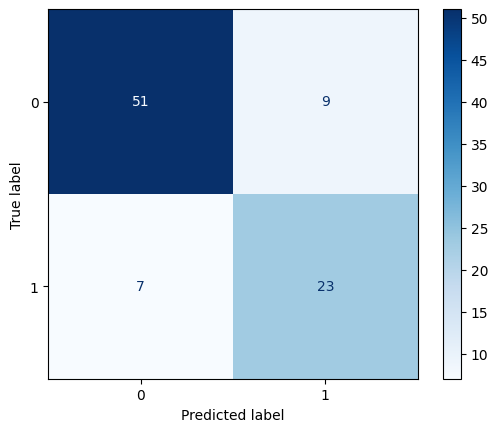

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc = SVC()

# Fit the model on the training data
SVC_cl = svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = SVC_cl.predict(X_test)

# Generate the classification report as a DataFrame
SVC_cl_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

# Display the classification report
print(SVC_cl_report)

# Confusion matrix for SVC predictions
cm = confusion_matrix(y_test, y_pred, labels=SVC_cl.classes_)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVC_cl.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues')  # You can adjust the color map to your liking
plt.grid(False)  # Remove grid
plt.show()  # Display the plot


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
#Hyperparameter tuning with GridSearchCV
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}
grid_search = GridSearchCV(SVC(), param_grid=params_grid, scoring='f1', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=1)

In [26]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'kernel': 'sigmoid'}


In [27]:
# Make predictions with the best model
preds = best_model.predict(X_test)

                   0          1  accuracy  macro avg  weighted avg
precision   0.816667   0.633333  0.755556      0.725      0.755556
recall      0.816667   0.633333  0.755556      0.725      0.755556
f1-score    0.816667   0.633333  0.755556      0.725      0.755556
support    60.000000  30.000000  0.755556     90.000     90.000000


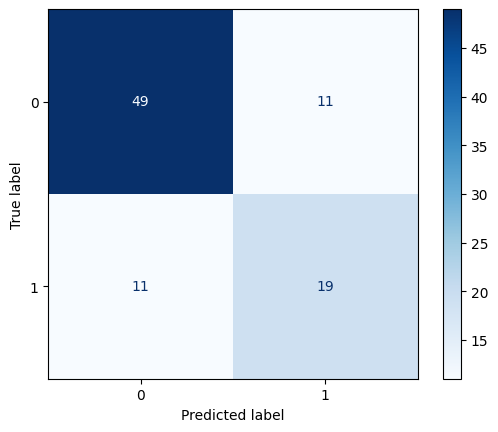

In [28]:
# Generate and display the classification report
SVC_cl_report = pd.DataFrame(classification_report(y_test, preds, output_dict=True))
print(SVC_cl_report)

# Confusion matrix for best model
cm = confusion_matrix(y_test, preds, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

4. Decision Tree Classifier

Decision Tree Classifier Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.848485   0.833333  0.844444   0.840909      0.843434
recall      0.933333   0.666667  0.844444   0.800000      0.844444
f1-score    0.888889   0.740741  0.844444   0.814815      0.839506
support    60.000000  30.000000  0.844444  90.000000     90.000000


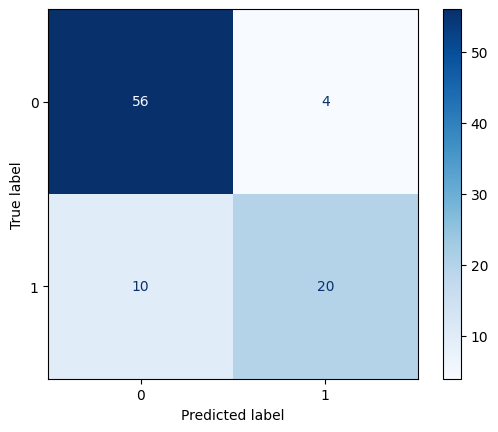

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier (you can adjust max_depth and other parameters)
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42, criterion='entropy')

# Fit the model on the training data
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_clf.predict(X_test)

# Generate the classification report as a DataFrame
dt_clf_report = pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True))

# Display the classification report
print("Decision Tree Classifier Classification Report:")
print(dt_clf_report)

# Generate and plot the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_clf.classes_)

# Create the confusion matrix display
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_clf.classes_)

# Plot the confusion matrix
disp_dt.plot(cmap='Blues')  # You can adjust the color map to your liking
plt.grid(False)  # Remove grid
plt.show()  # Display the plot


In [30]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

Best Decision Tree Model Performance:
                   0          1  accuracy  macro avg  weighted avg
precision   0.838710   0.714286       0.8   0.776498      0.797235
recall      0.866667   0.666667       0.8   0.766667      0.800000
f1-score    0.852459   0.689655       0.8   0.771057      0.798191
support    60.000000  30.000000       0.8  90.000000     90.000000


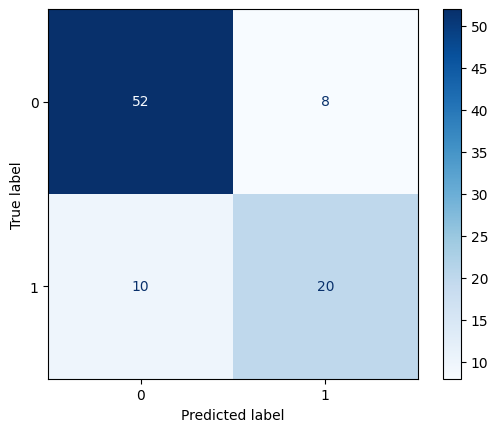

In [31]:
# Retrieve the best model from GridSearchCV
best_dt_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_clf.predict(X_test)

# Evaluate model performance
print("Best Decision Tree Model Performance:")
dt_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
print(dt_report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt_clf.classes_)
disp.plot(cmap='Blues')
plt.grid(False)
plt.show()
